### Importação dos dados



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


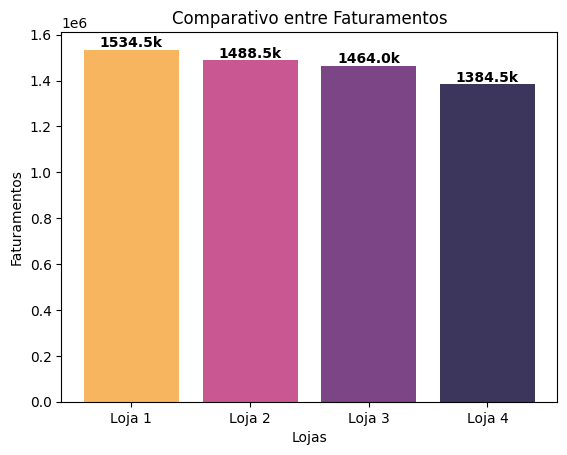

In [26]:
faturamentoLoja1 = sum(loja["Preço"])
faturamentoLoja2 = sum(loja2["Preço"])
faturamentoLoja3 = sum(loja3["Preço"])
faturamenteLoja4 = sum(loja4["Preço"])

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamenteLoja4]

plt.bar(lojas, faturamentos, color=['#F8B55F', '#C95792', '#7C4585', '#3D365C'])
plt.title("Comparativo entre Faturamentos")
plt.xlabel("Lojas")
plt.ylabel("Faturamentos")

for i in range(len(lojas)):
    valor = faturamentos[i]
    texto = f"{valor/1000:.1f}k"
    plt.text(i, valor * 1.02 , texto, ha='center', va='center', color='black', fontsize=10, fontweight='bold')

plt.show()

# 2. Vendas por Categoria


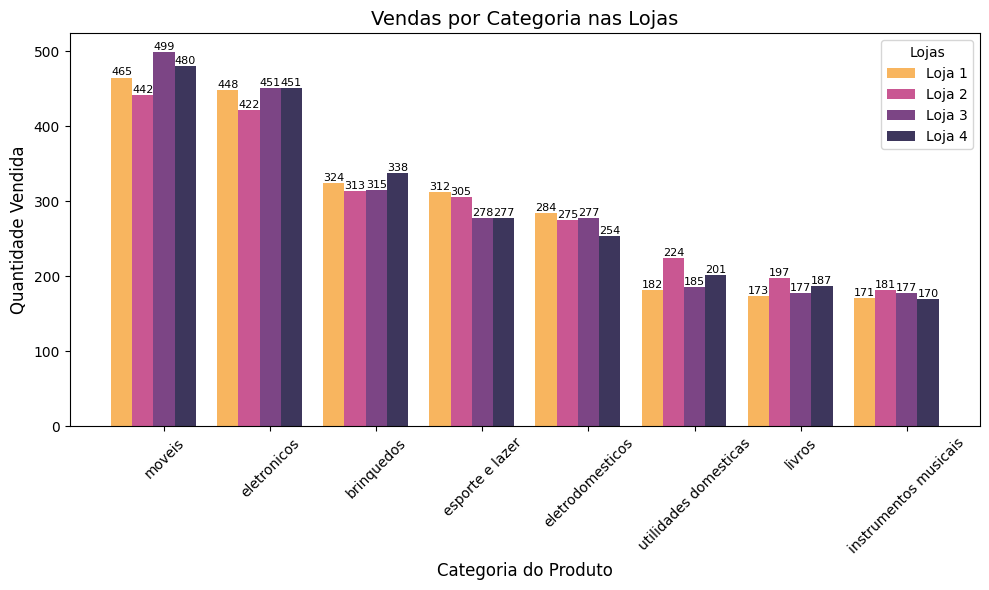

In [52]:
def qtd_Categoria(loja):
    qtd_categoria = loja['Categoria do Produto'].value_counts().to_dict()
    return qtd_categoria

vendasCategoria1 = qtd_Categoria(loja)
vendasCategoria2 = qtd_Categoria(loja2)
vendasCategoria3 = qtd_Categoria(loja3)
vendasCategoria4 = qtd_Categoria(loja4)

cores = ['#F8B55F', '#C95792', '#7C4585', '#3D365C']

def plotar_grafico_barras(vendasCategorias, lojas_nome):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, vendasCategoria in enumerate(vendasCategorias):
        categorias = list(vendasCategoria.keys())
        quantidades = list(vendasCategoria.values())

        largura = 0.2
        deslocamento = (i - len(vendasCategorias) / 2) * largura

        barras = ax.bar([x + deslocamento for x in range(len(categorias))], quantidades, width=largura, label=lojas_nome[i], color=cores[i])

        for x, y in zip(range(len(categorias)), quantidades):
            ax.text(x + deslocamento, y + 0.2, str(y), ha='center', va='bottom', fontsize=8)

    ax.set_title("Vendas por Categoria nas Lojas", fontsize=14)
    ax.set_xlabel("Categoria do Produto", fontsize=12)
    ax.set_ylabel("Quantidade Vendida", fontsize=12)
    ax.set_xticks(range(len(categorias)))
    ax.set_xticklabels(categorias, rotation=45)
    ax.legend(title="Lojas")

    plt.tight_layout()
    plt.show()

vendasCategorias = [vendasCategoria1, vendasCategoria2, vendasCategoria3, vendasCategoria4]
lojas_nome = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plotar_grafico_barras(vendasCategorias, lojas_nome)


# 3. Média de Avaliação das Lojas

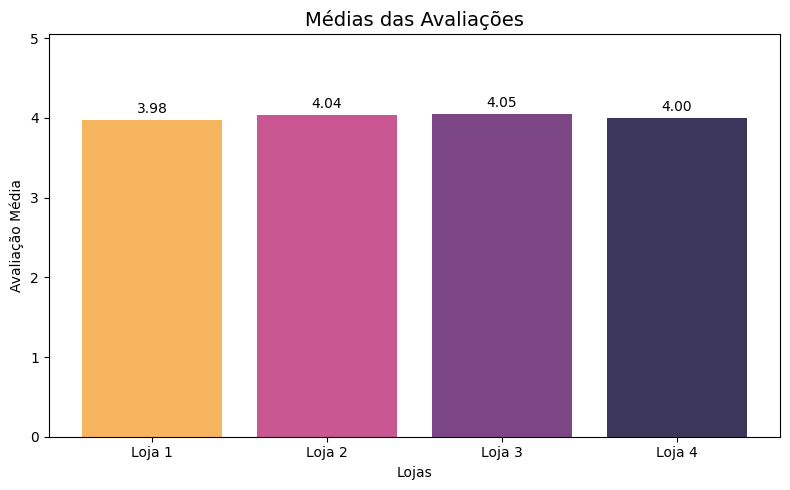

In [65]:
import matplotlib.pyplot as plt

medias1 = loja['Avaliação da compra'].mean()
medias2 = loja2['Avaliação da compra'].mean()
medias3 = loja3['Avaliação da compra'].mean()
medias4 = loja4['Avaliação da compra'].mean()

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [medias1, medias2, medias3, medias4]
cores = ['#F8B55F', '#C95792', '#7C4585', '#3D365C']

plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, medias, color=cores)
plt.title("Médias das Avaliações", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Avaliação Média")

for i, barra in enumerate(barras):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 0.05,
             f"{medias[i]:.2f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(medias) + 1)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

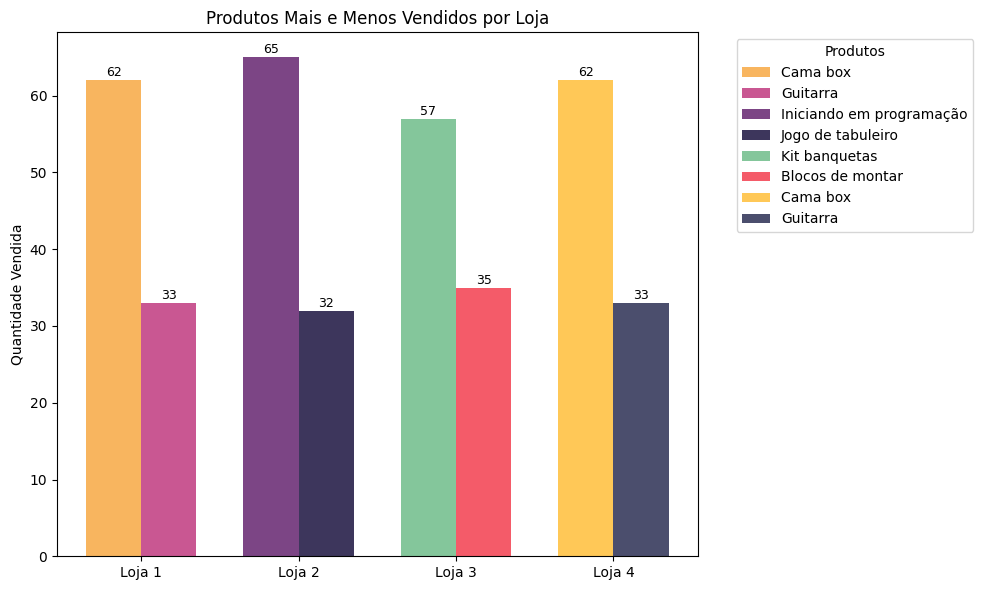

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def comparativoProdutos(loja):
    prodMaisVendido = loja["Produto"].value_counts().idxmax()
    qtdMaisVendido = loja["Produto"].value_counts().max()

    prodMenosVendido = loja["Produto"].value_counts().idxmin()
    qtdMenosVendido = loja["Produto"].value_counts().min()

    return prodMaisVendido, qtdMaisVendido, prodMenosVendido, qtdMenosVendido

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
dados_lojas = [loja, loja2, loja3, loja4]
cores_produtos = ['#F8B55F', '#C95792', '#7C4585', '#3D365C', '#84C69B', '#F45B69', '#FFC857', '#4B4E6D']

labels = []
quantidades = []
cores = []

produtos_nomes = []

for i, loja in enumerate(dados_lojas):
    mais, qtdMais, menos, qtdMenos = comparativoProdutos(loja)

    labels.append(f"Loja {i+1}")
    produtos_nomes.append((mais, menos))
    quantidades.append((qtdMais, qtdMenos))
    cores.append((cores_produtos[i*2 % len(cores_produtos)], cores_produtos[(i*2+1) % len(cores_produtos)]))

x = np.arange(len(lojas))
largura = 0.35

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(lojas)):
    ax.bar(x[i] - largura/2, quantidades[i][0], width=largura, color=cores[i][0], label=produtos_nomes[i][0] if produtos_nomes[i][0] not in produtos_nomes[:i] else "")
    ax.text(x[i] - largura/2, quantidades[i][0] + 0.5, str(quantidades[i][0]), ha='center', fontsize=9)

    ax.bar(x[i] + largura/2, quantidades[i][1], width=largura, color=cores[i][1], label=produtos_nomes[i][1] if produtos_nomes[i][1] not in produtos_nomes[:i] else "")
    ax.text(x[i] + largura/2, quantidades[i][1] + 0.5, str(quantidades[i][1]), ha='center', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.set_title("Produtos Mais e Menos Vendidos por Loja")
ax.set_ylabel("Quantidade Vendida")

ax.legend(title="Produtos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


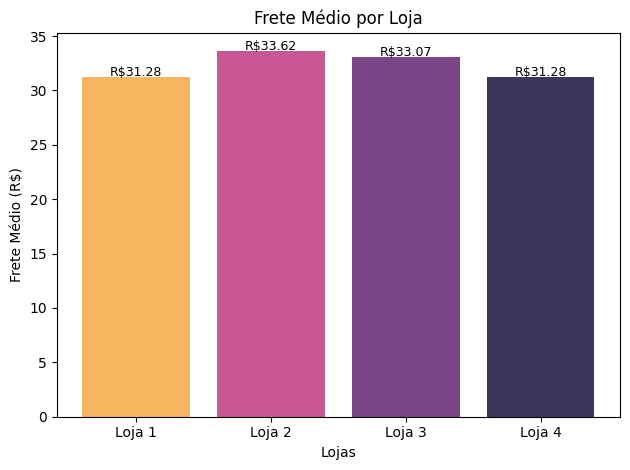

In [74]:
frete1 = loja['Frete'].mean()
frete2 = loja2['Frete'].mean()
frete3 = loja3['Frete'].mean()
frete4 = loja4['Frete'].mean()

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes = [frete1, frete2, frete3, frete4]

cores = ['#F8B55F', '#C95792', '#7C4585', '#3D365C']

plt.bar(lojas, fretes, color=cores)
plt.title("Frete Médio por Loja")
plt.xlabel("Lojas")
plt.ylabel("Frete Médio (R$)")

for i in range(len(lojas)):
    plt.text(i, fretes[i] + 0.1, f"R${fretes[i]:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()
